<a href="https://colab.research.google.com/github/GermanOmar/ICM/blob/master/Taller1COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER  #1



Predecir el peso de un pez en función de sus características:

# Pasos para usar modelos de Machine learning

In [110]:
print ("Hola mundo")

Hola mundo


1. LIBRERIAS

In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

2. Importar data

In [112]:
!git clone https://github.com/GermanOmar/ICM

fatal: destination path 'ICM' already exists and is not an empty directory.


In [113]:
#Experimental data
data = pd.read_table('PEZ2.txt') 
data.describe()


,Especies,L1,L2,L3,Altura,Ancho,Peso
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.880503,26.247170,28.415723,31.227044,58.448069,29.771799,398.326415
std,2.026298,9.996441,10.716328,11.610246,53.288655,23.562730,357.978317
min,1.000000,7.500000,8.400000,8.800000,1.972000,1.160000,0.000000
25%,2.000000,19.050000,21.000000,23.150000,9.815000,5.365500,120.000000
50%,5.000000,25.200000,27.300000,29.400000,52.983000,31.571000,273.000000
75%,5.000000,32.700000,35.500000,39.650000,93.313000,48.292000,650.000000
max,7.000000,59.000000,63.400000,68.000000,187.542000,77.957000,1650.000000


3. Ver relacion entre variables

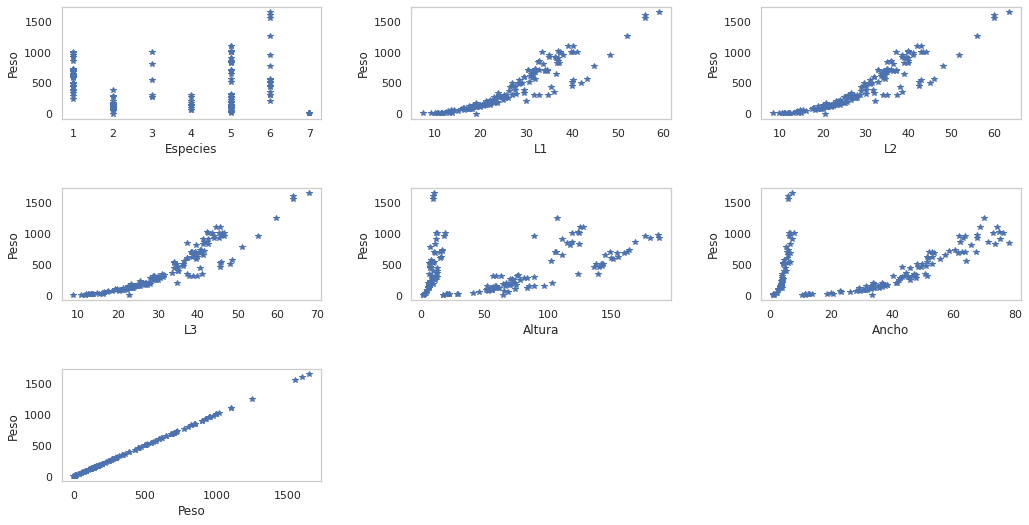

In [114]:
fields = ['Especies', 'L1','L2','L3', 'Altura','Ancho', 'Peso']

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['Peso'], 'b*')
  plt.xlabel(field)
  plt.ylabel('Peso')

plt.tight_layout()


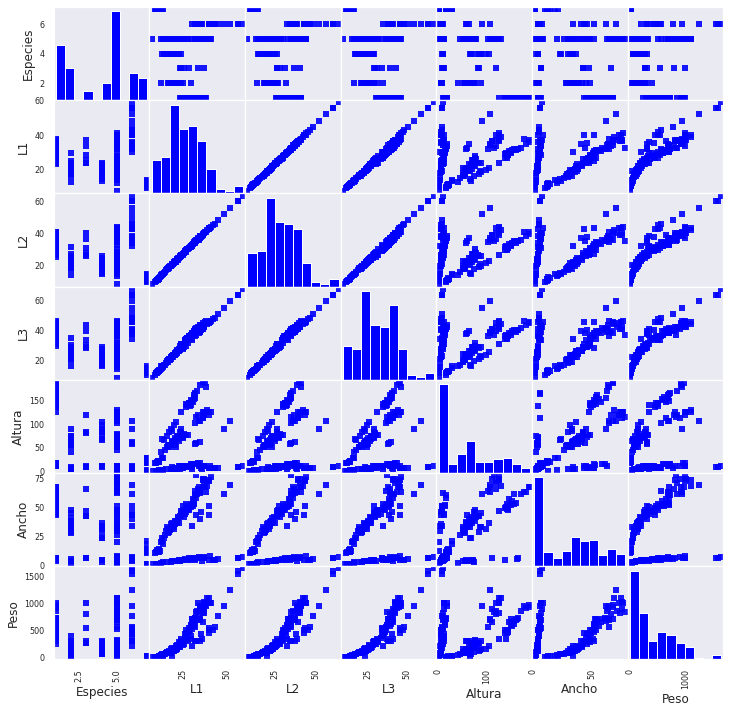

In [115]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='o', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='blue', hist_kwds={'color':['blue']})

warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Función de distribución de probabilidad (PDF)')

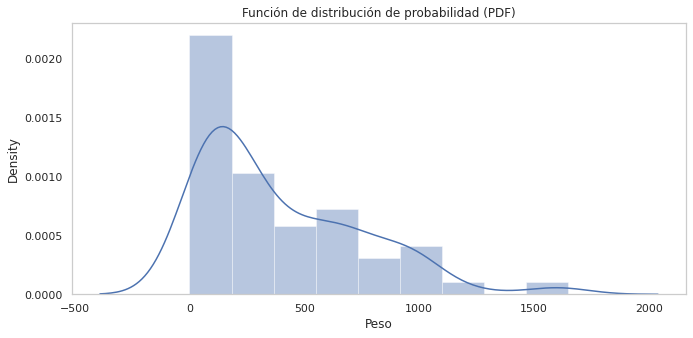

In [130]:
plt.figure(figsize=[11,5])
sns.distplot(data['Peso'])
plt.title('Función de distribución de probabilidad (PDF)')

4. Dividir data

In [116]:
X=data[['Especies','L1','L2','L3', 'Altura','Ancho']]
Y=data['Peso'][:,None]

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 127  test samples: 32


5. Escalar dataset

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Algoritmos de ML

## Gaussian Process Regressor

Gaussian Process
MSE train: 813.021592430921
MSE test: 8855.14080239346
MSE train < MSE test? True

R2_train:  0.9933862087157205
R2_test:  0.9377447609632126

R2:  0.9377447609632126
RMSE:  94.10175770087113
MAE:  54.94848326147839



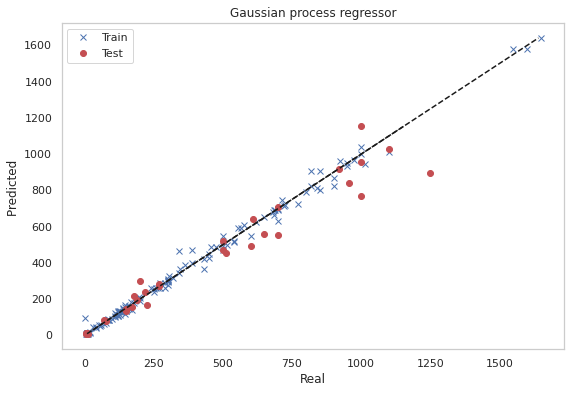

In [119]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(alpha=0.01, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=20, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=42)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted ')
plt.xlabel('Real')
plt.title("Gaussian process regressor")
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
print()

## Algoritmo XGBR

In [120]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9999199327868303


-XGBRegressor -
------------------
MSE test: 8687.803817169264

R2:  0.9389212079839095
RMSE:  93.20838919952037
MAE:  61.43729694485665



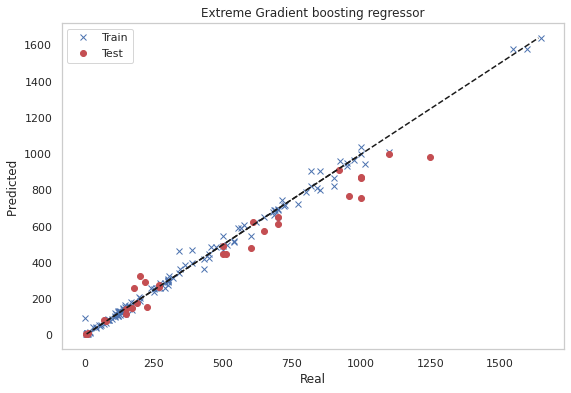

In [121]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted ')
plt.xlabel('Real')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
print()

## Redes neuronales


R2_train:  0.9933862087157205
R2:  0.9449251788972828
RMSE:  93.20838919952037
MAE:  57.70956911234977



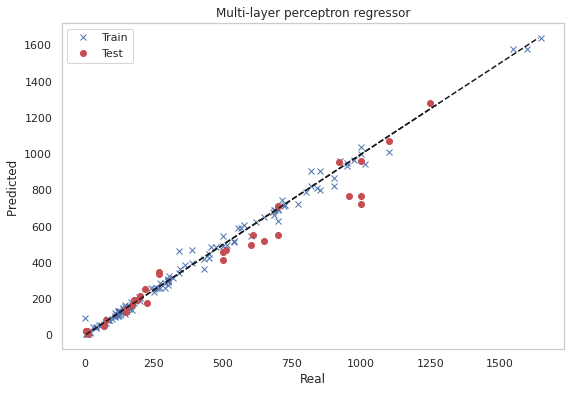

In [122]:
from sklearn.neural_network import MLPRegressor

MLP =MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=3000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted ')
plt.xlabel('Real')
plt.title("Multi-layer perceptron regressor")
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
print()

# PREDICCIONES

Escribir los parametros para realizar la predicción:


In [135]:
X_p = [5, 27, 29, 30, 76, 46]
X_pr=np.array(X_p)
X_pr

array([ 5, 27, 29, 30, 76, 46])

In [136]:
X_pre=X_pr.reshape(1, -1)
X_pre

array([[ 5, 27, 29, 30, 76, 46]])

In [137]:
X_pred = scaler.fit_transform(X_pre)
X_pred

array([[0., 0., 0., 0., 0., 0.]])

## GBR

In [138]:
#PREDICTION
Peso1=GP.predict(X_pred)
print("<El peso es: ", Peso1)

<El peso es:  [[337.50110246]]


## XGBR

In [141]:
#PREDICTION
Peso2=xgbr.predict(X_pred)
print("<El peso es: ", Peso2)

<El peso es:  [298.45514]


## MLP

In [140]:
Peso3=MLP.predict(X_pred)
print("<El peso es: ", Peso3)

<El peso es:  [392.94782677]


*The End*




